# Evaluation of Multi-Tier Framework for measuring access to electricity 

### Importing the useful libraries

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")
import math

### Importing the dataset

In [123]:
df = pd.read_csv('Main_dataset.csv')

In [124]:
df.head()

,Unnamed: 0,HHID,Cluster,strata,Province,District,Sector,Cellule,Village,B1,...,T28,T28B,T28C,DATE_START,TIME_START,DATE_END,TIME_END,cluster,sample_weight,Locality
0,0,1.102021e+12,1,11,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,2.0,...,NaN,NaN,NaN,18/11/2016,12:05,18/11/2016,12:49,11,476.61765,Rural
1,1,1.102021e+12,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,1.0,...,NaN,NaN,NaN,18/11/2016,10:23,18/11/2016,11:26,12,370.04202,Rural
2,2,1.102021e+12,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,1.0,...,NaN,NaN,NaN,18/11/2016,11:32,18/11/2016,12:24,12,370.04202,Rural
3,3,1.102021e+12,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,1.0,...,NaN,NaN,NaN,18/11/2016,10:30,18/11/2016,11:17,12,370.04202,Rural
4,4,1.102021e+12,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,1.0,...,No,NaN,NaN,18/11/2016,10:14,18/11/2016,11:28,12,370.04202,Rural


# Analysing different Attributes

Attributes which are analysed for MTF_Rwanda_Questionnaire_Household: 

1. Capacity
2. Availability
3. Reliability
4. Quality
5. Affordability
6. Formality
7. Health and safety

### Downloading csv file from dta format

df.to_csv("Main_dataset.csv")

# Selecting our first attribute for analysis: Capacity

To find out the power capacity, we need to know the different sources of power available. From our dataset:
    
1. C22: Power available from the national grid
2. C64: Power available from the mini grid
3. C88: Power available from the generator set
4. C117: Power available from the inverter
5. C119: Power available from the batteries
6. C151: Power available from solar panel (Not present in the dataset but is there in the survey)
7. C154: Power available from solar batteries (Not present in the dataset but is there in the survey)
8. Other source: Pico-Hyro (power capacity question not mentioned in the survey)

In [125]:
df_analysis= df[['C22', 'C64','C88','C117','C119A']]

In [126]:
df_analysis.tail()

,C22,C64,C88,C117,C119A
3290,NaN,NaN,NaN,NaN,NaN
3291,4.65,NaN,NaN,NaN,NaN
3292,6.05,NaN,NaN,NaN,NaN
3293,4.65,NaN,NaN,NaN,NaN
3294,NaN,NaN,NaN,NaN,NaN


## Renaming the columns

For a better understanding of the dataset, the columns are named as follows:

1. C22: National_Grid
2. C64: Mini_Grid
3. C88: Generator
4. C117: Inverter
5. C119A: Battery

In [127]:
df_analysis.columns = ['National_Grid', 'Mini_Grid','Generator','Inverter','Battery']

In [128]:
df_analysis.tail()

,National_Grid,Mini_Grid,Generator,Inverter,Battery
3290,NaN,NaN,NaN,NaN,NaN
3291,4.65,NaN,NaN,NaN,NaN
3292,6.05,NaN,NaN,NaN,NaN
3293,4.65,NaN,NaN,NaN,NaN
3294,NaN,NaN,NaN,NaN,NaN


In [129]:
df_analysis.describe()

,National_Grid,Mini_Grid,Generator,Inverter,Battery
count,1478.000000,8.000000,1.0,1.0,4.000000
mean,20.231604,9.883625,12.0,220.0,20.000000
std,30.050734,5.797545,NaN,NaN,33.665016
min,2.000000,4.651000,12.0,220.0,0.000000
25%,4.650000,4.651000,12.0,220.0,0.000000
50%,9.300000,9.302000,12.0,220.0,5.000000
75%,23.260000,11.627750,12.0,220.0,25.000000
max,400.000000,18.605000,12.0,220.0,70.000000


## Disaggregating attribute capacity into "National_Grid" and "Total_capacity"

1. The attribute capacity has been further disaggregated into "National_Grid" and "Total_capacity" to study the dynamics thoroughly.

2. Page 14 of MTF Energy Access Country Diagnostic report confirms that the average monthly household consumption of electricity is 20.8 kWh nationwide, 29.2 kWh in urban areas, and 9.9 kWh in rural areas. This means that the values recorded in the MTF survey for capacity are in kWh.

3. 26.8% of households households have been assessed as having basic access to electricity supply. The remaining 73.2% have no electricity source

### First analysing capacity: "National_Grid"

In [130]:
df_cap=df_analysis[['National_Grid']]

In [131]:
df_cap.tail()

,National_Grid
3290,NaN
3291,4.65
3292,6.05
3293,4.65
3294,NaN


In [132]:
df_cap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   National_Grid  1478 non-null   float64
dtypes: float64(1)
memory usage: 25.9 KB


The power capacity units provided in the dataset are in monthly kWh. However, for TIER analysis the units are in daily Wh consumption. Therefore, dividing the dataset by 30 and multiplying it by 1000.

In [133]:
df_cap["National_Grid"] = df_cap.National_Grid.apply(lambda x: x if math.isnan(x) else (x*1000)/30)

In [134]:
df_cap.tail()

,National_Grid
3290,NaN
3291,155.000000
3292,201.666667
3293,155.000000
3294,NaN


In [83]:
df_cap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   National_Grid  1478 non-null   float64
dtypes: float64(1)
memory usage: 25.9 KB


### Visualizing the new dataset

In [84]:
df_cap.describe()

,National_Grid
count,1478.000000
mean,674.386784
std,1001.691143
min,66.666667
25%,155.000000
50%,310.000000
75%,775.333333
max,13333.333333


## Checking for outliers in "National_Grid"

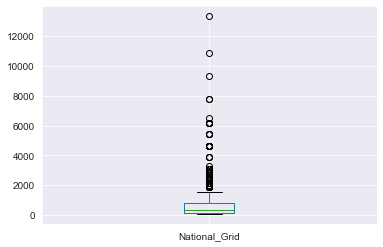

In [85]:
df_cap.boxplot(column='National_Grid', return_type='axes')

### Checking the percentage of outliers

In [86]:
#Outlier treatment for active and reactive power
Q1=df_cap.National_Grid.quantile(0.25)
Q3=df_cap.National_Grid.quantile(0.75)

#Calculating inter-quantile range
IQR=Q3-Q1

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

df_cap["Outliers"] = df_cap.National_Grid.apply(lambda x: "NaN" if math.isnan(x) else ("True" if x > upper_bound or x < lower_bound else "False"))

In [87]:
df_cap.tail()

,National_Grid,Outliers
3290,NaN,NaN
3291,155.000000,False
3292,201.666667,False
3293,155.000000,False
3294,NaN,NaN


In [88]:
df_cap['Outliers'].value_counts()

NaN      1817
False    1370
True      108
Name: Outliers, dtype: int64

Text(0.5, 1.0, 'Percentage of outliers in "National_Grid"')

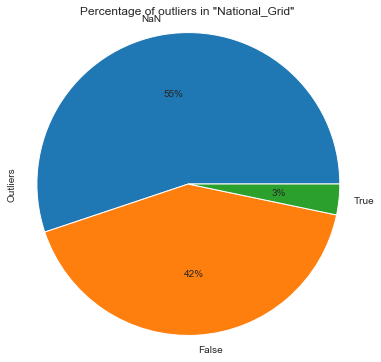

In [89]:
#Pie plot
df_cap.Outliers.value_counts().plot(kind='pie', autopct='%1.0f%%',figsize=(6,6))
plt.axis('equal')
plt.title('Percentage of outliers in "National_Grid"')

From the above Pie chart we can see that there are 3% of outliers present in our dataset

### Removing the outliers

In [90]:
df_cap_cleaned= df_cap[df_cap.Outliers != 'True']

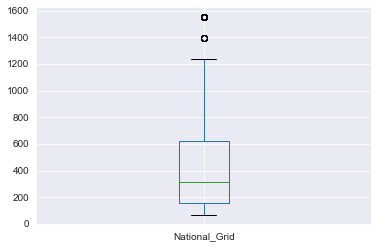

In [91]:
df_cap_cleaned.boxplot(column='National_Grid', return_type='axes')

## Replacing NaN values with "Missing_data" 

This is done to keep the missing values into analysis (As it is important to know how many missing values do we have)

In [92]:
df_cap_cleaned.drop('Outliers', axis=1, inplace=True)

In [93]:
df_cap_cleaned["National_Grid"] = df_cap_cleaned.National_Grid.apply(lambda x: "Missing_data" if math.isnan(x) else x)

In [94]:
df_cap_cleaned.head()

,National_Grid
0,Missing_data
1,Missing_data
2,Missing_data
3,Missing_data
4,Missing_data


In [95]:
df_cap_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3187 entries, 0 to 3294
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   National_Grid  3187 non-null   object
dtypes: object(1)
memory usage: 49.8+ KB


### Adding column "TIER" to the dataset with respect to household's power consumption

In [96]:
def conditions(National_Grid):
    if National_Grid =='Missing_data':
        return "Missing_data"
    elif National_Grid<3:
        return "0"
    elif 3<=National_Grid<50:
        return "1"
    elif 50<=National_Grid<200:
        return "2"
    elif 200<=National_Grid<800:
        return "3"
    elif 800<=National_Grid<2000:
        return "4"
    else:
        return "5"
    
func = np.vectorize(conditions)
transform = func(df_cap_cleaned.National_Grid)
df_cap_cleaned["TIER"] = transform

In [97]:
df_cap_cleaned.head()

,National_Grid,TIER
0,Missing_data,Missing_data
1,Missing_data,Missing_data
2,Missing_data,Missing_data
3,Missing_data,Missing_data
4,Missing_data,Missing_data


### Printing the TIER counts

In [98]:
df_cap_cleaned['TIER'].value_counts()

Missing_data    1817
3                743
2                450
4                177
Name: TIER, dtype: int64

### Visualizing the TIER levels 

Text(0.5, 1.0, 'TIER levels based on power capacity')

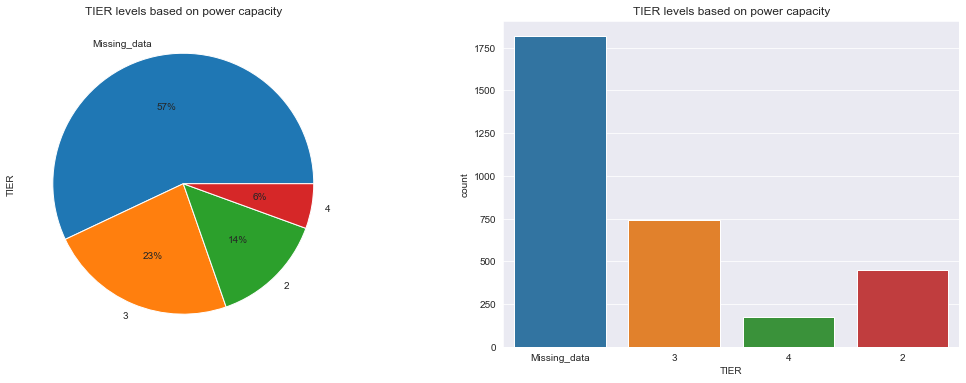

In [99]:
#Pie plot
f,ax=plt.subplots(1,2, figsize=(18,6))
df_cap_cleaned['TIER'].value_counts().plot.pie( autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('TIER levels based on power capacity')

#Boxplot
sns.countplot('TIER',data=df_cap_cleaned,ax=ax[1])
ax[1].set_title('TIER levels based on power capacity')

Page 22 of MTF Energy Access Country Diagnostic report confirms that almost all households in Tier 3 or above are connected to the grid (Maximum percentage of grid connected households lies in TIER 3). Most households in Tier 0 have no access to electricity.

## 2. Attribute: Availabilty (Day)

Methodology:

To understand the attribute more carefully, two columns have been taekn into consideration, C26A and C26B; 
* C26A represents the hours of electricity available each day and night from the grid in the worst months. 
* Whereas, C26B represents the hours of electricity available each day and nightfrom the grid in the actual months.

In [100]:
df_av= df[['C26A','C26B']]

In [101]:
df_av.tail()

,C26A,C26B
3290,NaN,NaN
3291,13.0,18.0
3292,19.0,24.0
3293,NaN,23.0
3294,NaN,NaN


In [102]:
df_av.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   C26A    652 non-null    object
 1   C26B    1591 non-null   object
dtypes: object(2)
memory usage: 51.6+ KB


## Calculation

In this step a new column "C26A_new" hasbeen formed. For this column, the values from column "C26A, worst months" has been taken as the main source of analysis and any missing information (missing value of a household) for this column has been taken from the column "C26B, actual months". This is done because the world bank group considers worst situation for analysis. 

In [103]:
df_av['C26A_new'] = df_av.C26A.fillna(value=df_av.C26B)

In [104]:
df_av.tail()

,C26A,C26B,C26A_new
3290,NaN,NaN,NaN
3291,13.0,18.0,13.0
3292,19.0,24.0,19.0
3293,NaN,23.0,23.0
3294,NaN,NaN,NaN


In [105]:
df_av.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   C26A      652 non-null    object
 1   C26B      1591 non-null   object
 2   C26A_new  1591 non-null   object
dtypes: object(3)
memory usage: 77.4+ KB


In [106]:
df_av['C26A_new'].value_counts()

24.0          269
22.0          232
23.0          217
20.0          199
Don't know    189
12.0           70
21.0           59
15.0           50
18.0           46
10.0           31
6.0            28
2.0            24
5.0            23
19.0           22
3.0            21
16.0           17
1.0            15
4.0            15
17.0           14
14.0           13
8.0            12
13.0           10
11.0            7
7.0             5
9.0             3
Name: C26A_new, dtype: int64

### Replacing NaN and "Don't know" values with "12345" (random number) 

This is done to keep the missing values into analysis (As it is important to know how many missing values do we have)

In [107]:
df_av["C26A_new"].fillna(12345, inplace = True) 

In [108]:
df_av=df_av.replace(to_replace="Don't know",value=12345)

In [109]:
df_av.tail()

,C26A,C26B,C26A_new
3290,NaN,NaN,12345
3291,13.0,18.0,13.0
3292,19.0,24.0,19.0
3293,NaN,23.0,23.0
3294,NaN,NaN,12345


In [110]:
df_av.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   C26A      652 non-null    object
 1   C26B      1591 non-null   object
 2   C26A_new  3295 non-null   object
dtypes: object(3)
memory usage: 77.4+ KB


### Converting coulmn C26A_new from Dtype: Object to Dtype: Float

In [111]:
df_av["C26A_new"] = pd.to_numeric(df_av["C26A_new"])

In [112]:
df_av.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   C26A      652 non-null    object 
 1   C26B      1591 non-null   object 
 2   C26A_new  3295 non-null   float64
dtypes: float64(1), object(2)
memory usage: 77.4+ KB


### Adding column "AVAILABILITY" to the dataset with respect to household's daily consumption

In [113]:
# AVAILABILITY: Day
#Note: conditions for TIER 1 and 2 are the same

def conditions(C26A_new):
    if C26A_new ==12345:
        return "Missing_data"
    elif C26A_new<4:
        return "0"
    elif 4<=C26A_new<8:
        return "1&2"
    elif 8<=C26A_new<16:
        return "3"
    elif 16<=C26A_new<23:
        return "4"
    else:
        return "5"
    
func = np.vectorize(conditions)
transform = func(df_av.C26A_new)
df_av["AVAILABILITY_DAY"] = transform

In [114]:
df_av.tail()

,C26A,C26B,C26A_new,AVAILABILITY_DAY
3290,NaN,NaN,12345.0,Missing_data
3291,13.0,18.0,13.0,3
3292,19.0,24.0,19.0,4
3293,NaN,23.0,23.0,5
3294,NaN,NaN,12345.0,Missing_data


In [115]:
df_av['AVAILABILITY_DAY'].value_counts()

Missing_data    1893
4                589
5                486
3                196
1&2               71
0                 60
Name: AVAILABILITY_DAY, dtype: int64

### Visualizing the TIER levels 

Text(0.5, 1.0, 'TIER levels based on electricity availability')

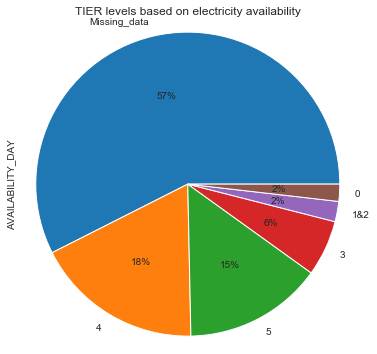

In [116]:
df_av.AVAILABILITY_DAY.value_counts().plot(kind='pie', autopct='%1.0f%%',figsize=(6,6))
plt.axis('equal')
plt.title('TIER levels based on electricity availability')

## 2. Attribute: Availabilty (Evening)

Methodology:

To understand the attribute more carefully, two columns have been taekn into consideration, C27A and C27B; 
* C27A represents the hours of electricity available each evening from the grid in the worst months. 
* Whereas, C27B represents the hours of electricity available each evening from the grid in the actual months.

In [48]:
df_ave= df[['C27A','C27B']]

In [49]:
df_ave.tail()

,C27A,C27B
3290,NaN,NaN
3291,2.0,4.0
3292,1.0,4.0
3293,NaN,4.0
3294,NaN,NaN


In [50]:
df_ave.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   C27A    652 non-null    object
 1   C27B    1591 non-null   object
dtypes: object(2)
memory usage: 51.6+ KB


## Calculation

In this step a new column "C27A_new" hasbeen formed. For this column, the values from column "C27A, worst months" has been taken as the main source of analysis and any missing information (missing value of a household) for this column has been taken from the column "C27B, actual months". This is done because the world bank group considers worst situation for analysis. 

In [51]:
df_ave['C27A_new'] = df_ave.C27A.fillna(value=df_ave.C27B)

In [52]:
df_ave.tail()

,C27A,C27B,C27A_new
3290,NaN,NaN,NaN
3291,2.0,4.0,2.0
3292,1.0,4.0,1.0
3293,NaN,4.0,4.0
3294,NaN,NaN,NaN


In [53]:
df_ave.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   C27A      652 non-null    object
 1   C27B      1591 non-null   object
 2   C27A_new  1591 non-null   object
dtypes: object(3)
memory usage: 77.4+ KB


In [54]:
df_ave['C27A'].value_counts()

2.0           212
3.0           199
4.0            98
1.0            91
Don't know     52
Name: C27A, dtype: int64

### Replacing NaN and "Don't know" values with "12345" (random number) 

This is done to keep the missing values into analysis (As it is important to know how many missing values do we have)

In [55]:
df_ave["C27A_new"].fillna(12345, inplace = True) 

In [56]:
df_ave=df_ave.replace(to_replace="Don't know",value=12345)

In [57]:
df_ave.tail()

,C27A,C27B,C27A_new
3290,NaN,NaN,12345
3291,2.0,4.0,2.0
3292,1.0,4.0,1.0
3293,NaN,4.0,4.0
3294,NaN,NaN,12345


In [58]:
df_ave.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   C27A      652 non-null    object
 1   C27B      1591 non-null   object
 2   C27A_new  3295 non-null   object
dtypes: object(3)
memory usage: 77.4+ KB


### Converting coulmn C27A_new from Dtype: Object to Dtype: Float

In [59]:
df_ave["C27A_new"] = pd.to_numeric(df_ave["C27A_new"])

In [60]:
df_ave.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   C27A      652 non-null    object 
 1   C27B      1591 non-null   object 
 2   C27A_new  3295 non-null   float64
dtypes: float64(1), object(2)
memory usage: 77.4+ KB


### Adding column "AVAILABILITY" to the dataset with respect to household's evening consumption

In [61]:
# AVAILABILITY: Evening
#Note: conditions for TIER 4 and 5 are the same


def conditions(C27A_new):
    if C27A_new ==12345:
        return "Missing_data"
    elif C27A_new<1:
        return "0"
    elif 1<=C27A_new<2:
        return "1"
    elif 2<=C27A_new<3:
        return "2"
    elif 3<=C27A_new<4:
        return "3"
    else:
        return "4&5"
    
func = np.vectorize(conditions)
transform = func(df_ave.C27A_new)
df_ave["AVAILABILITY_EVENING"] = transform

In [62]:
df_ave.tail()

,C27A,C27B,C27A_new,AVAILABILITY_EVENING
3290,NaN,NaN,12345.0,Missing_data
3291,2.0,4.0,2.0,2
3292,1.0,4.0,1.0,1
3293,NaN,4.0,4.0,4&5
3294,NaN,NaN,12345.0,Missing_data


In [63]:
df_ave['AVAILABILITY_EVENING'].value_counts()

Missing_data    1797
4&5              750
3                393
2                238
1                117
Name: AVAILABILITY_EVENING, dtype: int64

### Visualizing the TIER levels 

Text(0.5, 1.0, 'TIER levels based on electricity availability')

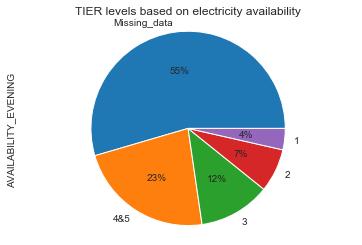

In [64]:
df_ave.AVAILABILITY_EVENING.value_counts().plot(kind='pie', autopct='%1.0f%%',figsize=(6,6))
plt.axis('equal')
plt.title('TIER levels based on electricity availability')

## 3. Attribute: Reliability

Methodology:

To understand the attribute more carefully, two columns have been taekn into consideration, C29A and C29B; 
* C29A represents the electricity disruption from the grid in the worst months. 
* Whereas, C29B represents the electricity disruption from the grid in the actual months.

In [65]:
df_dis= df[['C29A','C29B']]

In [66]:
df_dis.tail()

,C29A,C29B
3290,NaN,NaN
3291,3.0,1.0
3292,1.0,Don't know
3293,NaN,2.0
3294,NaN,NaN


In [67]:
df_dis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   C29A    652 non-null    object
 1   C29B    1591 non-null   object
dtypes: object(2)
memory usage: 51.6+ KB


## Calculation

In this step a new column "C29A_new" hasbeen formed. For this column, the values from column "C29A, worst months" has been taken as the main source of analysis and any missing information (missing value of a household) for this column has been taken from the column "C29B, actual months". This is done because the world bank group considers worst situation for analysis. 

In [68]:
df_dis['C29A_new'] = df_dis.C29A.fillna(value=df_dis.C29B)

In [69]:
df_dis.tail()

,C29A,C29B,C29A_new
3290,NaN,NaN,NaN
3291,3.0,1.0,3.0
3292,1.0,Don't know,1.0
3293,NaN,2.0,2.0
3294,NaN,NaN,NaN


In [70]:
df_dis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   C29A      652 non-null    object
 1   C29B      1591 non-null   object
 2   C29A_new  1591 non-null   object
dtypes: object(3)
memory usage: 77.4+ KB


In [71]:
df_dis['C29A'].value_counts()

1.0           207
2.0           150
Don't know    114
3.0            90
4.0            42
5.0            27
6.0            11
8.0             5
10.0            4
7.0             2
Name: C29A, dtype: int64

### Replacing NaN and "Don't know" values with "11111" (random number) 

This is done to keep the missing values into analysis (As it is important to know how many missing values do we have)

In [72]:
df_dis["C29A_new"].fillna(11111, inplace = True) 

In [73]:
df_dis=df_dis.replace(to_replace="Don't know",value=11111)

In [74]:
df_dis.tail()

,C29A,C29B,C29A_new
3290,NaN,NaN,11111
3291,3.0,1.0,3.0
3292,1.0,11111,1.0
3293,NaN,2.0,2.0
3294,NaN,NaN,11111


In [75]:
df_dis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   C29A      652 non-null    object
 1   C29B      1591 non-null   object
 2   C29A_new  3295 non-null   object
dtypes: object(3)
memory usage: 77.4+ KB


### Converting coulmn C27A_new from Dtype: Object to Dtype: Float

In [76]:
df_dis["C29A_new"] = pd.to_numeric(df_dis["C29A_new"])

In [77]:
df_dis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   C29A      652 non-null    object 
 1   C29B      1591 non-null   object 
 2   C29A_new  3295 non-null   float64
dtypes: float64(1), object(2)
memory usage: 77.4+ KB


Now this new column "C29A_new" depicts daily disruption from the grid. To calculate weekly disruption, this column has to be multiplied by 7.

In [78]:
df_dis['C29A_new'] = df_dis['C29A_new'].apply(lambda x: x*7)

In [79]:
df_dis.tail()

,C29A,C29B,C29A_new
3290,NaN,NaN,77777.0
3291,3.0,1.0,21.0
3292,1.0,11111,7.0
3293,NaN,2.0,14.0
3294,NaN,NaN,77777.0


### Adding column "RELIABILITY" to the dataset with respect to electricity disruption

In [80]:
# RELIABILITY
#Note: conditions for TIER 0,1 and 2 are the same and TIER 3 and 4 are the same


def conditions(C29A_new):
    if C29A_new ==77777:
        return "Missing_data"
    elif C29A_new>14:
        return "0,1&2"
    elif 3<C29A_new<14:
        return "3&4"
    else:
        return "5"
    
func = np.vectorize(conditions)
transform = func(df_dis.C29A_new)
df_dis["RELIABILITY"] = transform

In [81]:
df_dis.tail()

,C29A,C29B,C29A_new,RELIABILITY
3290,NaN,NaN,77777.0,Missing_data
3291,3.0,1.0,21.0,"0,1&2"
3292,1.0,11111,7.0,3&4
3293,NaN,2.0,14.0,5
3294,NaN,NaN,77777.0,Missing_data


In [82]:
df_dis['RELIABILITY'].value_counts()

Missing_data    1971
3&4              691
5                353
0,1&2            280
Name: RELIABILITY, dtype: int64

### Visualizing the TIER levels 

Text(0.5, 1.0, 'TIER levels based on electricity reliabilty')

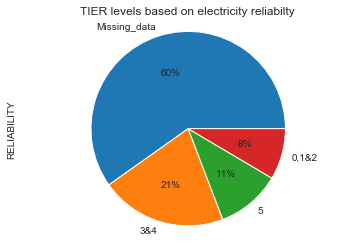

In [83]:
df_dis.RELIABILITY.value_counts().plot(kind='pie', autopct='%1.0f%%',figsize=(6,6))
plt.axis('equal')
plt.title('TIER levels based on electricity reliabilty')

## 4. Attribute: Quality

For this attribute column C39 has been selected as it describes if in the last 12 months, any of the appliances got damaged because the voltage was going up and down from the grid.

In [84]:
df_q= df[['C39']]

In [85]:
df_q.tail()

,C39
3290,NaN
3291,Yes
3292,No
3293,No
3294,NaN


In [86]:
df_q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   C39     1591 non-null   object
dtypes: object(1)
memory usage: 25.9+ KB


In [87]:
df_q['C39'].value_counts()

No            1115
Yes            343
Don?t know     133
Name: C39, dtype: int64

### Making a new column and replacing NaN and "Don't know" values with "11111" (random number) 

This is done to keep the missing values into analysis (As it is important to know how many missing values do we have)

In [88]:
df_q['C39_new'] = df_q.C39.fillna(value=df_q.C39)

In [89]:
df_q["C39_new"].fillna(11111, inplace = True) 

In [90]:
df_q=df_q.replace(to_replace="Don?t know",value=11111)

In [91]:
df_q.head()

,C39,C39_new
0,NaN,11111
1,NaN,11111
2,NaN,11111
3,NaN,11111
4,NaN,11111


In [92]:
df_q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   C39      1591 non-null   object
 1   C39_new  3295 non-null   object
dtypes: object(2)
memory usage: 51.6+ KB


In [93]:
df_q['C39_new'].value_counts()

11111    1837
No       1115
Yes       343
Name: C39_new, dtype: int64

### Adding column "QUALITY" to the dataset 

In [94]:
# RELIABILITY
#Note: conditions for TIER 0,1,2 and 3 are the same and TIER 4 and 5 are the same


def conditions(C39_new):
    if C39_new ==11111:
        return "Missing_data"
    elif C39_new=="Yes":
        return "0,1,2&3"
    else:
        return "4&5"
    
func = np.vectorize(conditions)
transform = func(df_q.C39_new)
df_q["QUALITY"] = transform

In [95]:
df_q.tail()

,C39,C39_new,QUALITY
3290,NaN,11111,Missing_data
3291,Yes,Yes,"0,1,2&3"
3292,No,No,4&5
3293,No,No,4&5
3294,NaN,11111,Missing_data


In [96]:
df_q['QUALITY'].value_counts()

Missing_data    1837
4&5             1115
0,1,2&3          343
Name: QUALITY, dtype: int64

### Visualizing the TIER levels 

Text(0.5, 1.0, 'TIER levels based on electricity quality')

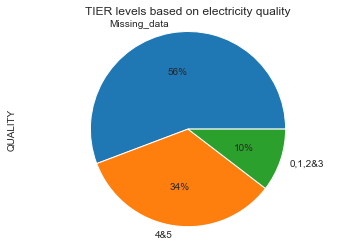

In [97]:
df_q.QUALITY.value_counts().plot(kind='pie', autopct='%1.0f%%',figsize=(6,6))
plt.axis('equal')
plt.title('TIER levels based on electricity quality')